In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("ProcessData.csv")

In [3]:
df.head()

,Time,ActivePower,WindSpeed,Theoretical_Power_Curve,WindDirection,Loss,month,Day,Hours,Minutes,mean_Direction,Direction
0,2018-01-01 00:00:00,380.05,5.31,416.33,259.99,36.28,1,1,0,0,270,W
1,2018-01-01 00:10:00,453.77,5.67,519.92,268.64,66.15,1,1,0,10,270,W
2,2018-01-01 00:20:00,306.38,5.22,390.90,272.56,84.52,1,1,0,20,270,W
3,2018-01-01 00:30:00,419.65,5.66,516.13,271.26,96.48,1,1,0,30,270,W
4,2018-01-01 00:40:00,380.65,5.58,491.70,265.67,111.05,1,1,0,40,270,W


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time                     50530 non-null  object 
 1   ActivePower              50530 non-null  float64
 2   WindSpeed                50530 non-null  float64
 3   Theoretical_Power_Curve  50530 non-null  float64
 4   WindDirection            50530 non-null  float64
 5   Loss                     50530 non-null  float64
 6   month                    50530 non-null  int64  
 7   Day                      50530 non-null  int64  
 8   Hours                    50530 non-null  int64  
 9   Minutes                  50530 non-null  int64  
 10  mean_Direction           50530 non-null  int64  
 11  Direction                50530 non-null  object 
dtypes: float64(5), int64(5), object(2)
memory usage: 4.6+ MB


## Model VAR

In [6]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [7]:
df_var=df[["Time","ActivePower","WindSpeed","Theoretical_Power_Curve"]]
df_var.set_index("Time",inplace=True)
df_var.head()

,ActivePower,WindSpeed,Theoretical_Power_Curve
Time,,,
2018-01-01 00:00:00,380.05,5.31,416.33
2018-01-01 00:10:00,453.77,5.67,519.92
2018-01-01 00:20:00,306.38,5.22,390.90
2018-01-01 00:30:00,419.65,5.66,516.13
2018-01-01 00:40:00,380.65,5.58,491.70


In [13]:
nobs = 5053
df_train, df_test = df_var[0:-nobs], df_var[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(45477, 3)
(5053, 3)


In [32]:
df_test.set

,Time,ActivePower,WindSpeed,Theoretical_Power_Curve,WindDirection,Loss,month,Day,Hours,Minutes,mean_Direction,Direction
50030,2018-12-28 12:40:00,0.00,1.98,0.00,131.35,0.00,12,28,12,40,120,SEE
50031,2018-12-28 12:50:00,0.00,1.98,0.00,111.86,0.00,12,28,12,50,120,SEE
50032,2018-12-28 13:00:00,0.00,1.44,0.00,165.43,0.00,12,28,13,0,180,S
50033,2018-12-28 13:10:00,0.00,1.74,0.00,171.53,0.00,12,28,13,10,180,S
50034,2018-12-28 13:20:00,0.00,2.16,0.00,175.27,0.00,12,28,13,20,180,S
...,...,...,...,...,...,...,...,...,...,...,...,...
50525,2018-12-31 23:10:00,2963.98,11.40,3397.19,80.50,433.21,12,31,23,10,90,E
50526,2018-12-31 23:20:00,1684.35,7.33,1173.06,84.06,-511.30,12,31,23,20,90,E
50527,2018-12-31 23:30:00,2201.11,8.44,1788.28,84.74,-412.82,12,31,23,30,90,E
50528,2018-12-31 23:40:00,2515.69,9.42,2418.38,84.30,-97.31,12,31,23,40,90,E


In [9]:
model = VAR(df_var)


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


We are going to use Lag = 18

In [10]:
x = model.select_order(maxlags=24)
x.summary()

,AIC,BIC,FPE,HQIC
0,27.11,27.11,5.964e+11,27.11
1,19.47,19.47,2.845e+08,19.47
2,19.44,19.45,2.776e+08,19.44
3,19.41,19.42,2.701e+08,19.42
4,19.41,19.41,2.678e+08,19.41
5,19.40,19.41,2.658e+08,19.40
6,19.40,19.41,2.654e+08,19.40
7,19.39,19.41,2.646e+08,19.40
8,19.39,19.41,2.641e+08,19.40
9,19.39,19.41,2.639e+08,19.40


In [11]:
#With lag= 18
model_fitted = model.fit(18)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 05, May, 2023
Time:                     11:57:03
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    19.4113
Nobs:                     50512.0    HQIC:                   19.3915
Log likelihood:          -704378.    FPE:                2.61630e+08
AIC:                      19.3824    Det(Omega_mle):     2.60777e+08
--------------------------------------------------------------------
Results for equation ActivePower
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                              -7.316977         3.241445           -2.257           0.024
L1.ActivePower                      1.002515         0.007813          128.307           0.00

In [14]:
# Input data for forecasting
forecast_input = df_var.values[-nobs:]
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_var.index[-nobs:], columns=df_var.columns + '_forecast')

,ActivePower_forecast,WindSpeed_forecast,Theoretical_Power_Curve_forecast
Time,,,
2018-11-26 19:00:00,2751.968905,9.993627,2731.023291
2018-11-26 19:10:00,2724.709148,9.971555,2693.666390
2018-11-26 19:20:00,2683.444221,9.908688,2637.059126
2018-11-26 19:30:00,2603.531945,9.814245,2584.928416
2018-11-26 19:40:00,2621.263413,9.874954,2608.625463
...,...,...,...
2018-12-31 23:10:00,1311.559837,7.568065,1495.961285
2018-12-31 23:20:00,1311.559837,7.568065,1495.961285
2018-12-31 23:30:00,1311.559837,7.568065,1495.961285


Text(0.5, 1.0, 'VAR Predictions')

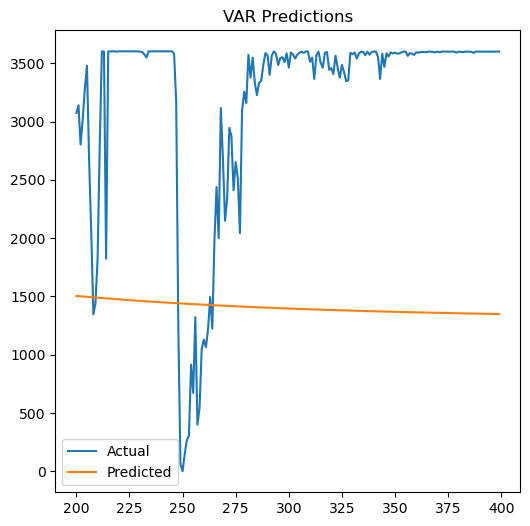

In [19]:
test_original = df_test
#test_original.index = pd.to_datetime(test_original.index)
y_test=test_original['ActivePower']
y_pred=df_forecast['ActivePower_forecast']

sam=200
f=2
plt.rcParams["figure.figsize"] = (6, 6)
plt.plot(range(sam,f*sam),y_test[sam:f*sam], label='Actual')
plt.plot(range(sam,f*sam),y_pred[sam:f*sam], label='Predicted')
plt.legend()
plt.title('VAR Predictions')

In [40]:
#With lag= 10
model_fitted = model.fit(10)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 21, Apr, 2023
Time:                     18:45:33
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    19.4035
Nobs:                     50520.0    HQIC:                   19.3923
Log likelihood:          -704683.    FPE:                2.62885e+08
AIC:                      19.3872    Det(Omega_mle):     2.62401e+08
--------------------------------------------------------------------
Results for equation ActivePower
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                              -7.257564         3.140657           -2.311           0.021
L1.ActivePower                      1.003705         0.007786          128.917           0.00

In [47]:
# Input data for forecasting
forecast_input = df_var.values[-nobs:]
forecast_input
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_var.index[-nobs:], columns=df_var.columns + '_forecast')
df_forecast

,ActivePower_forecast,WindSpeed_forecast,Theoretical_Power_Curve_forecast
Time,,,
2018-11-26 19:00:00,2771.302617,10.024752,2739.033392
2018-11-26 19:10:00,2740.193041,9.977452,2687.195754
2018-11-26 19:20:00,2708.256158,9.970883,2648.291332
2018-11-26 19:30:00,2634.018049,9.906639,2602.642155
2018-11-26 19:40:00,2640.172054,9.947098,2616.867744
...,...,...,...
2018-12-31 23:10:00,1311.985475,7.569737,1496.409685
2018-12-31 23:20:00,1311.985475,7.569737,1496.409685
2018-12-31 23:30:00,1311.985475,7.569737,1496.409685


<AxesSubplot:xlabel='Time'>

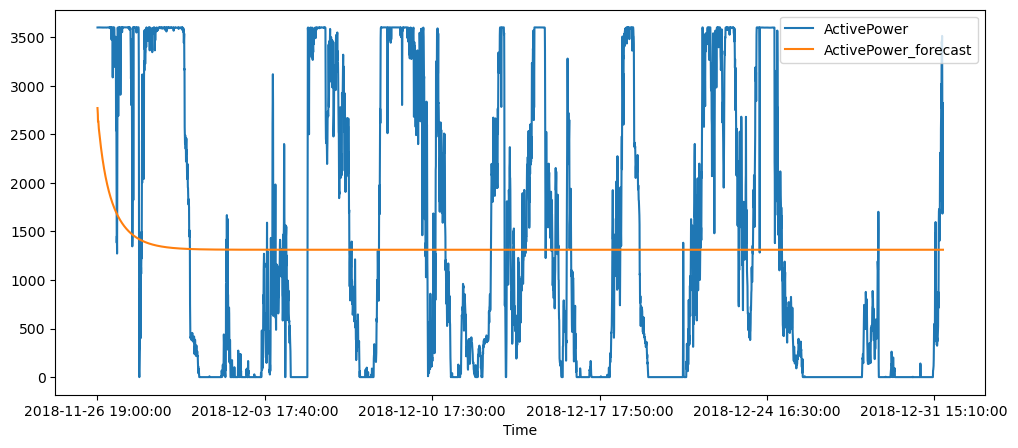

In [48]:
test_original = df_test
#test_original.index = pd.to_datetime(test_original.index)
test_original['ActivePower'].plot(figsize=(12,5),legend=True)
df_forecast['ActivePower_forecast'].plot(legend=True)

In [55]:
rmse = np.mean((df_forecast - actual)**2)**0.5
rmse

ActivePower_forecast                1444.639878
WindSpeed_forecast                     4.691026
Theoretical_Power_Curve_forecast    1444.176279
dtype: float64

##############################################################################################################################

 Nous remarquons que le modèle VAR n'a pas donnée une précision acceptable donc on cherche à le éviter. Maintenant on va passer à l'étude de la régression linéaire.

# Régrassion linéaire

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
SEED=42
# Créer le modèle de régression linéaire
regression = LinearRegression()

In [7]:
X=df[["WindSpeed", "Theoretical_Power_Curve", "WindDirection"]]
y=df['ActivePower']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [8]:
# Entraîner le modèle avec les données d'entraînement
regression.fit(X_train, y_train)

# Prédire de nouvelles valeurs
  # Nouvelles valeurs pour prédire
y_pred = regression.predict(X_test)

In [10]:
# Evaluate your Linear Reg model
from statsmodels.tools.eval_measures import mse,rmse 
error = rmse(y_test , y_pred)
error

411.71167857034897

Les résultats de la regression linéaire sont largement meuilleur que celle de modèle VAR.

## Random Forest

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rfr = RandomForestRegressor(n_estimators=100, # 20 trees
                            max_depth=6, # 6 levels
                            random_state=SEED)

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [30]:
from statsmodels.tools.eval_measures import mse,rmse 
error = rmse(y_test , y_pred)
error

387.97471161791907

La regression en utilisant "Random Forest" est beacoup mieux que celle en utilisant l'étude des séries chronologique comme le modèle VAR et mieux que l'utilisation de régression linéaire. Il est mieux en terme de minimisation des erreurs et en terme de temps de compilation.